In [62]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('startup_data.csv')
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB


None

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000
std,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128
min,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000
25%,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000
50%,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000
75%,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000
max,5.000000,299.810000,4357.490000,99.710000,4984.000000,10.000000,1.000000,2022.000000


In [6]:
data.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


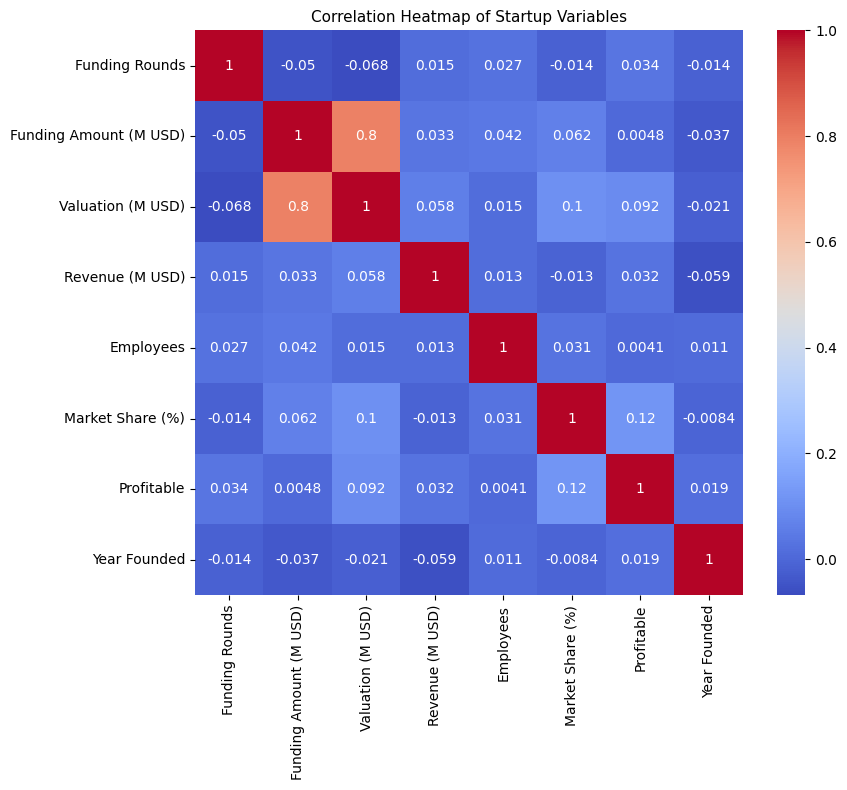

In [18]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            )
plt.title('Correlation Heatmap of Startup Variables', fontsize=11)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Funding Amount vs Valuation')

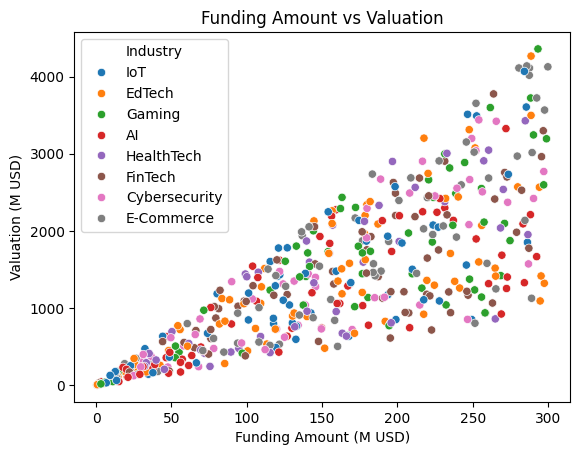

In [8]:
sns.scatterplot(x='Funding Amount (M USD)', y='Valuation (M USD)', data=data, hue='Industry')
plt.title('Funding Amount vs Valuation')

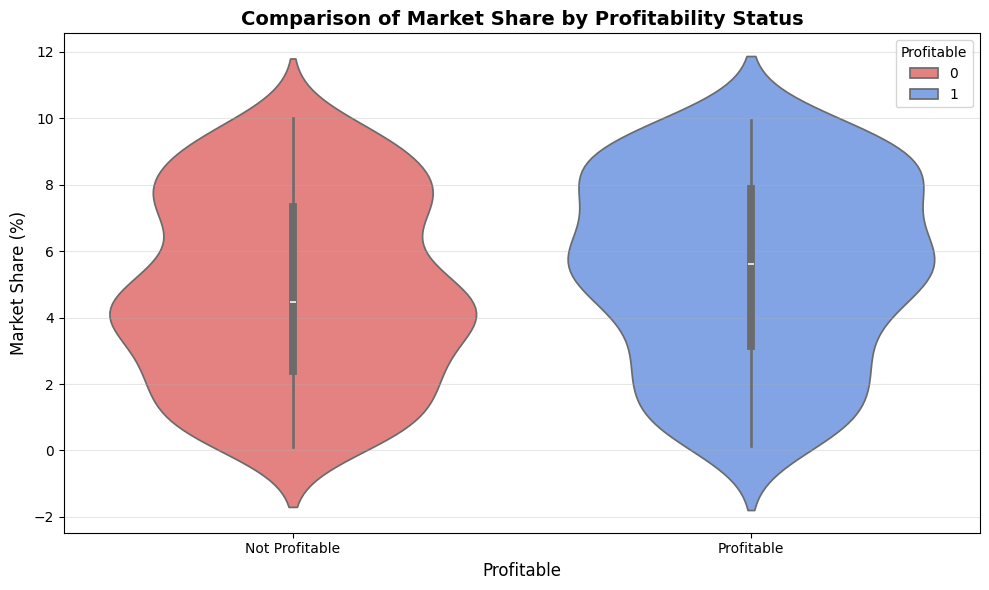

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Profitable', y='Market Share (%)', data=data, hue='Profitable', palette=['#f57171', '#719ff5'])
plt.title('Comparison of Market Share by Profitability Status', fontsize=14, fontweight='bold')
plt.xlabel('Profitable', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.xticks([0, 1], ['Not Profitable', 'Profitable'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
numeric_data.head()

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded
0,1,101.09,844.75,67.87,1468,5.20,0,2006
1,1,247.62,3310.83,75.65,3280,8.10,1,2003
2,1,109.24,1059.37,84.21,4933,2.61,1,1995
3,5,10.75,101.90,47.08,1059,2.53,0,2003
4,4,249.28,850.11,50.25,1905,4.09,0,1997


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [203]:
# Prepare all features: numeric + categorical
numeric_features = numeric_data.drop(columns=['Profitable', 'Year Founded']).copy()
categorical_features = data[['Funding Rounds', 'Industry', 'Region', 'Exit Status']].copy()

In [204]:
ohs = OneHotEncoder(sparse_output=False, drop='first') 
ohs_encoded = ohs.fit_transform(categorical_features)
ohs_df = pd.DataFrame(ohs_encoded, columns=ohs.get_feature_names_out(categorical_features.columns))

X_final = pd.concat([numeric_features.reset_index(drop=True), ohs_df.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)
X_final_scaled = pd.DataFrame(X_final_scaled, columns=X_final.columns, index=X_final.index)

X_final_scaled.head()

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Funding Rounds_2,Funding Rounds_3,Funding Rounds_4,Funding Rounds_5,...,Industry_FinTech,Industry_Gaming,Industry_HealthTech,Industry_IoT,Region_Australia,Region_Europe,Region_North America,Region_South America,Exit Status_IPO,Exit Status_Private
0,-1.360170,-0.595480,-0.539330,0.634382,-0.768825,0.038170,-0.490607,-0.51558,-0.449359,-0.515580,...,-0.406818,-0.376235,-0.329617,2.682671,-0.524891,1.975338,-0.490607,-0.468521,-0.314485,0.660895
1,-1.360170,1.096611,1.984165,0.900471,0.540377,1.072098,-0.490607,-0.51558,-0.449359,-0.515580,...,-0.406818,-0.376235,-0.329617,-0.372763,-0.524891,-0.506242,-0.490607,2.134375,-0.314485,0.660895
2,-1.360170,-0.501366,-0.319713,1.193237,1.734699,-0.885235,-0.490607,-0.51558,-0.449359,-0.515580,...,-0.406818,-0.376235,-0.329617,-0.372763,-0.524891,-0.506242,-0.490607,2.134375,-0.314485,0.660895
3,1.418522,-1.638703,-1.299475,-0.076671,-1.064335,-0.913757,-0.490607,-0.51558,-0.449359,1.939563,...,-0.406818,2.657916,-0.329617,-0.372763,-0.524891,-0.506242,-0.490607,2.134375,-0.314485,0.660895
4,0.723849,1.115781,-0.533845,0.031748,-0.453085,-0.357575,-0.490607,-0.51558,2.225395,-0.515580,...,-0.406818,-0.376235,-0.329617,2.682671,-0.524891,1.975338,-0.490607,-0.468521,-0.314485,-1.513101


In [205]:
y = data['Profitable'].copy()
X = X_final.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (335, 23)
Test set: (165, 23)


In [206]:
# Note: Features are already scaled, so convergence should be better
lm = LogisticRegression(fit_intercept=True, max_iter=1000, random_state=42)
lm.fit(X_train, y_train)

/opt/miniconda3/envs/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [207]:
y_predicted = lm.predict(X_test)

In [208]:
print(f'Logistic Regression Score: {lm.score(X_test, y_test)}')
print(y.mean())


Logistic Regression Score: 0.6181818181818182
0.432


43.2% of Start-Ups were profitable, 56.8% null error rate (must beat this error)

In [209]:
print(metrics.accuracy_score(y_test, y_predicted))
print(metrics.confusion_matrix(y_test, y_predicted))


0.6181818181818182
[[69 28]
 [35 33]]


In [210]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69        97
           1       0.54      0.49      0.51        68

    accuracy                           0.62       165
   macro avg       0.60      0.60      0.60       165
weighted avg       0.61      0.62      0.61       165

